<a href="https://colab.research.google.com/github/ram30098singh/Deep-learning-and-NLP-/blob/main/DNLP_4thSep_simple_image_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 05th Dec, 2022
# Ref:
#   http://cs231n.github.io/neural-networks-2/
#	  https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
#
# Objective:
#   a) How Image augmentation is performed.
#   b) Image augmentation basics
#
#
# Data augmentation 4-steps:
#		  1. First create the ImageDataGenerator object with necessary properies
#	    2. If required, learn the 'train' data. Needed only for some types of
#        augmentation/processing such as zca_whitening. see Ref below:
#        Ref: https://stackoverflow.com/questions/46705600/keras-fit-image-augmentations-to-training-data-using-flow-from-directory
#	    3. Create the data-generator iterator using flow() method
#     4. Use the iterator in modeling in a for-loop



In [ ]:
#0.0 Display multiple command outputsfrom a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Call libraries

In [ ]:
# 1. Call libraries
%reset -f

# 1.1
import numpy as np
import os
from matplotlib import pyplot as plt

# 1.2 Import tensorflow libraries
#     This will import mnist dataset
from tensorflow.keras.datasets import mnist

# 1.3 For generating images on the fly (no need to store)
#     from given images
from tensorflow.keras.preprocessing.image import ImageDataGenerator



## Get data

In [ ]:
# 2. Use mnist module to fetch data from Internet & also load data
#    Dataset is cached locally at $HOME/.keras/datasets
#    or at C:\Users\ashok\.keras\datasets

In [ ]:
# 2.1 Download mnist dataset.
#     Data download to C:\Users\ashok\.keras\datasets
#     mnist.npz. 'npz' is a file format where several
#     numpy arrays can be stored compressed or uncompressed
#     Downloaded file is saved at: /root/.keras/datasets

(x_tr, y_tr), (x_te, y_te) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 2.1.1 Check the downloaded file
! ls -la /root/.keras/datasets

total 11232
drwxr-xr-x 2 root root     4096 Sep  4 03:38 .
drwxr-xr-x 1 root root     4096 Sep  4 03:38 ..
-rw-r--r-- 1 root root 11490434 Sep  4 03:38 mnist.npz


In [ ]:
# 2.2 How many images and image dimensions?
#     Depth of image is important dimension.
#     It is missing here. So depth is 1 ie only one channel.

x_tr.shape                    # [60000,28,28]
x_te.shape                    # (10000,28,28)

(60000, 28, 28)

(10000, 28, 28)

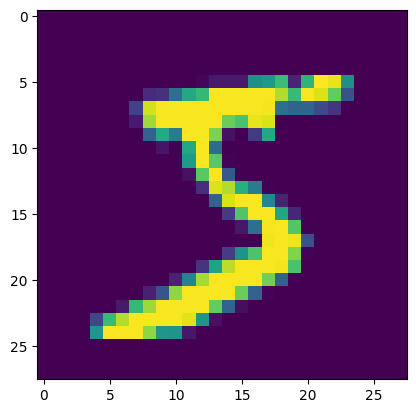

In [ ]:
plt.imshow(x_tr[0,:28,:28])

In [ ]:
# 2.3 Just look at first image and get its label

y_tr[0]
print("\n=========\n")
x_tr[0, :, :]

5

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
# Create a grid of 3x3 images
# AA. Plot sample digit images

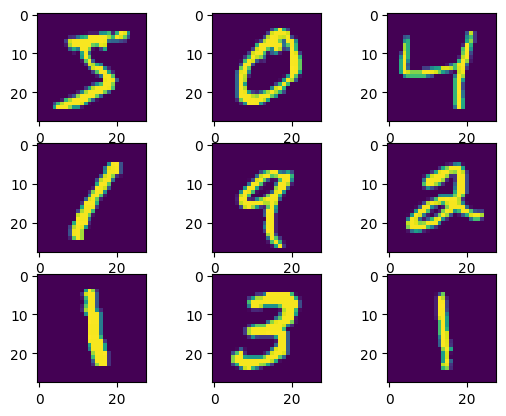

In [ ]:
# 3. Plot nine images
for i in range(0, 9):        # range(0,9): Starting from 0, generate 9 numbers
                             # 0,1,..8 (9 is excluded)
	_=plt.subplot(3,3, i +1) 	 # Plot in a grid of 3 rows, 3 columns at position (i +1)
	                           # For last image, i =8, 339 => 3 rows X 3 cols at index 9
	_=plt.imshow(x_tr[i])


## Data preprocessing

In [ ]:
######################## BB ##################################

In [ ]:
# 4.
## BB.Image generation and Feature Standardization
#     It is possible to standardize pixel values across the entire dataset.
#     One can perform feature standardization by setting the featurewise_center
#     and featurewise_std_normalization arguments on the ImageDataGenerator class.
#     These are in fact set to True by default and creating an instance of
#     ImageDataGenerator with no arguments will have the same effect.
# Standardize images across the dataset, mean=0, stdev=1


In [ ]:
# 4.1 Add no_of_channels to shape (tensorflow format: WIDTH X HEIGHT X CHANNEL):
#     Reshape to be [NoOfSamples][width][height][channel]

# 4.1.1
X_train = x_tr.reshape(60000, 28, 28,1)         # Being gray coloured, no of channels is 1
X_test = x_te.reshape(10000,  28, 28,1)

# 4.1.2 Check
X_train.shape


(60000, 28, 28, 1)

In [ ]:
# 4.2 Convert from int to float as required by Tensorflow
X_train.dtype                        # Unsigned integer

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train.dtype                         # 'float32'

dtype('uint8')

dtype('float32')

In [ ]:
#4.3.1 For lack of memory, we will experiment
#      on just 400 images

X_train = X_train[:400,...]
y_train = y_tr[:400,...]

## Examining Image Data generator

In [ ]:
# 4.3.2
# See http://cs231n.github.io/neural-networks-2/
# featurewise_center
#     Mean subtraction is the most common form of preprocessing.
#     It involves subtracting the mean across every individual
#     feature in the data, and has the geometric interpretation
#     of centering the cloud of data around the origin along
#     every dimension. In numpy, this operation would be
#     implemented as: X -= np.mean(X, axis = 0).
#     With images specifically, for convenience it can be common
#     to subtract a single value from all pixels (e.g. X -= np.mean(X)),
#     or to do so separately across the three color channels.
# featurewise_std_normalization
#     Normalization refers to normalizing the data dimensions
#     so that they are of approximately the same scale. There
#     are two common ways of achieving this normalization.
#     One is to divide each dimension by its standard deviation,
#     once it has been zero-centered: (X /= np.std(X, axis = 0)).
#     Another form of this preprocessing normalizes each dimension
#     so that the min and max along the dimension is -1 and 1 respectively.
#     It only makes sense to apply this preprocessing if you have a reason
#     to believe that different input features have different scales
#     (or units), but they should be of approximately equal importance
#     to the learning algorithm. In case of images, the relative scales
#     of pixels are already approximately equal (and in range from 0 to 255),
#     so it is not strictly necessary to perform this additional preprocessing step.


In [ ]:
# 4.3.3 Instantiate ImageDataGenerator:
#       Enhance image edges:

datagen = ImageDataGenerator(
                             zca_whitening=True,  # Ref: Kaggle: https://www.kaggle.com/nicw102168/exploring-zca-and-color-image-whitening
                             zca_epsilon=0.001,   # Sharpness of edges when data get decorrelated
							                      # See this link to check effect of zca_epsilon on image
							                      # https://stats.stackexchange.com/a/117459
                             featurewise_center=True,
                             featurewise_std_normalization=True
                            )

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1451: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn(


In [ ]:
# 4.4 Learn statistics of actual data, train
#     If you JUMP this step, you get a warning while plotting:
#     This ImageDataGenerator specifies `featurewise_center`, but it
#       hasn't been fit on any training data. Fit it
#        first by calling `.fit(numpy_data)`.

# 4.4.1 Learn data now
datagen.fit(X_train)

flow() method:<br>
Returns an Iterator yielding tuples of (x, y) where x is a numpy array of image data (in the case of a single image input) or a list of numpy arrays (in the case with additional inputs) and y is a numpy array of corresponding labels.

In [ ]:
# 4.5 'datagen' itself is an iterator. One can Iterate
#     over it to get images. But this iterator needs
#     to be configured using flow() method to decide
#     upon batch size to output at a time.
#     Create first the datagen.flow() iterator

# 4.5.1 Get iterator object. Iterator returns both
#       transformed data as also its label

batch_gen_iterator = datagen.flow(
                                   X_train,
                                   y_train,
                                   batch_size=2      # How many images to return at a time
                                  )

In [ ]:
next(batch_gen_iterator)[0]

array([[[[0.07166913],
         [0.07166913],
         [0.07166913],
         ...,
         [0.07166911],
         [0.07166911],
         [0.07166911]],

        [[0.07166911],
         [0.07166911],
         [0.07166911],
         ...,
         [0.07166911],
         [0.07166911],
         [0.07166911]],

        [[0.07166911],
         [0.07166911],
         [0.07166911],
         ...,
         [0.07166911],
         [0.07166911],
         [0.07166911]],

        ...,

        [[0.07166911],
         [0.07166911],
         [0.07166911],
         ...,
         [0.07166911],
         [0.07166911],
         [0.07166911]],

        [[0.07166911],
         [0.07166911],
         [0.07166911],
         ...,
         [0.07166911],
         [0.07166911],
         [0.07166911]],

        [[0.07166911],
         [0.07166911],
         [0.07166911],
         ...,
         [0.07166919],
         [0.07166919],
         [0.07166919]]],


       [[[0.02156993],
         [0.02156993],
         [0.02

In [ ]:
# 4.6
for i in batch_gen_iterator:
  xt = i[0]      # It is a tuple ((2, 28, 28, 1))
  xt.shape
  break


(2, 28, 28, 1)

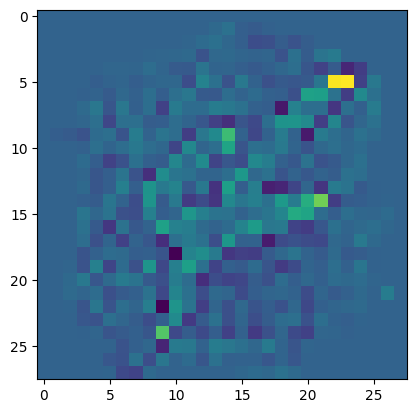

In [ ]:
# 4.7 Each time it renders a different image:

for i in batch_gen_iterator:
  xt = i[0]
  _=plt.imshow(xt[0, :, :]) ;
  break


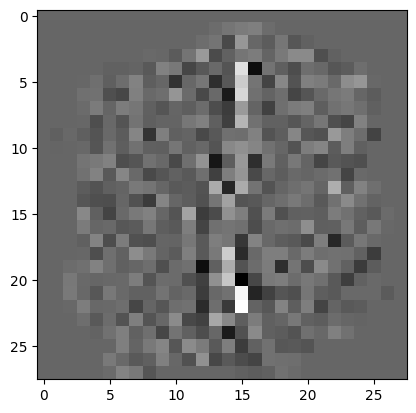

In [ ]:
# 4.8 Each time it renders a different image:
for i in batch_gen_iterator:
  xt = i[0]
  _=plt.imshow(xt[0, :, :], cmap=plt.cm.gray) ;
  break


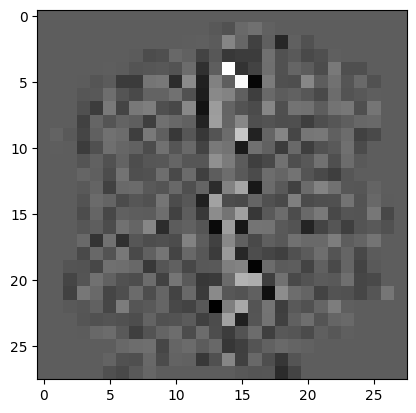

In [ ]:
# 4.5.3 Same as above again
x,y = next(batch_gen_iterator)
x = x[0].reshape(28,28)   # Get one image
plt.imshow(x, cmap=plt.get_cmap('gray'))

## Plot images:

In [ ]:
# 4.6 Configure batch size and retrieve one batch of images
def plot_images():
	batch_gen_iterator= datagen.flow(X_train, y_train, batch_size=9)
	for X_batch, y_batch in batch_gen_iterator:
		# create a grid of 3x3 images
		for i in range(0, 9):
			plt.subplot(330 + 1 + i)
			img = X_batch[i].reshape(28, 28)
			plt.imshow(img, cmap=plt.cm.gray)
		# show the plot
		plt.show()
		break

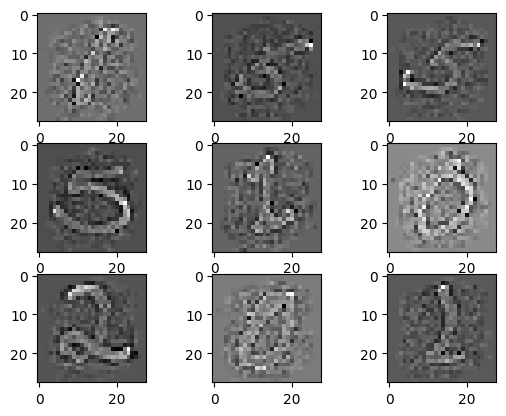

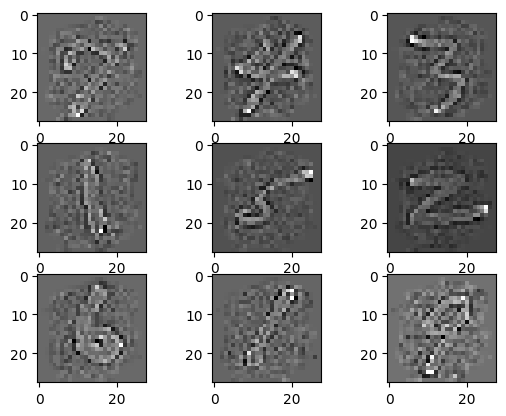

In [ ]:
# 4.7 Iterate over data-generator to get images in batches
#     embossing is clearer in these images
#     'Emboss means image stands out in relief'
plot_images()       # Plot a batch of nine images
plot_images()       # Plot another batch of nine images



In [ ]:
# 4.8 Running above example one can see that the effect is different,
#     seemingly somewhat darkening and lightening different digits.

## Rerieve data again

In [ ]:
# 5.1 Let us retrieve/reshape again X_train, y_train
#     from original data
x_tr.shape
X_train = x_tr.reshape(60000, 28, 28,1)
X_test = x_te.reshape(10000,  28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train[:400,...]
y_train = y_tr[:400,...]

(60000, 28, 28)

In [ ]:
# 5.2 Reshaped to be [NoOfSamples][width][height][channel]
X_train.shape
X_test.shape

(400, 28, 28, 1)

(10000, 28, 28, 1)

## Image Data Generator--Rotation

In [ ]:
######################## CC ##################################
#### Rotation of images

In [ ]:
# 6
## DD. Random Rotations
# Sometimes images in sample data may have varying and different rotations in the scene.
#  One can train one's model to better handle rotations of images by artificially and randomly
#   rotating images from dataset during training.

# 6.1 Define data preparation
datagen = ImageDataGenerator(
                            rotation_range=90
                            )

# 6.2 Fit parameters on our small data only (400 images)
datagen.fit(X_train)

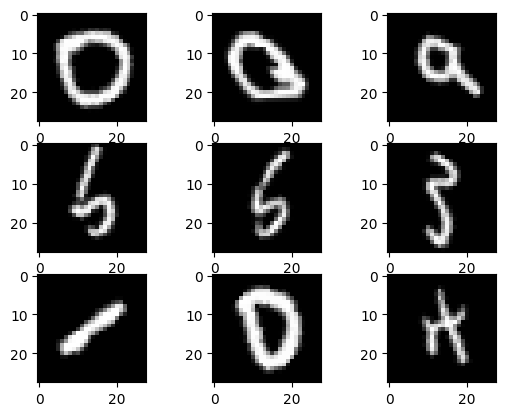

In [ ]:
# 6.4
plot_images()

## Image Data Generator--Random shifts

In [ ]:
# 7
## E. Random Shifts
#     Objects in images may not be centered in the frame. They may be off-center
#     in a variety of different ways. One can train deep learning network to expect
#     and currently handle off-center objects by artificially creating shifted versions
#     of training data. Keras supports separate horizontal and vertical random shifting
#     of training data by the width_shift_range and height_shift_range arguments.


In [ ]:
# 7.1 Define shift values, horizontal and vertical
shift1 = 0.2
shift2 = 0.3
datagen = ImageDataGenerator(
                             width_shift_range=shift1,     # Horizontal shift
                             height_shift_range=shift2     # Vertical shift
                             )
# 7.2 Learn data
datagen.fit(X_train)

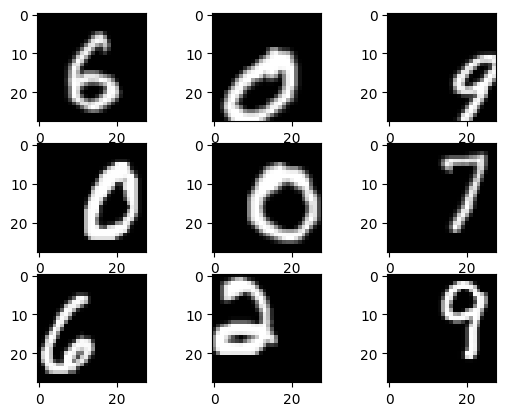

In [ ]:
# 7.3 Configure batch size and retrieve one batch of images
plot_images()

## Image Data Generator--Random flips

In [ ]:
# 8
## F. Random Flips
#       Another augmentation to image data that can improve performance on
#       large and complex problems is to create random flips of images in
#       training data.  Keras supports random flipping along both the vertical
#       and horizontal axes using the vertical_flip and horizontal_flip arguments.

# 8.1 Define data preparation
datagen = ImageDataGenerator(
                             horizontal_flip=True,
                             vertical_flip=True,
                            )

# 8.2 Learn data
datagen.fit(X_train)

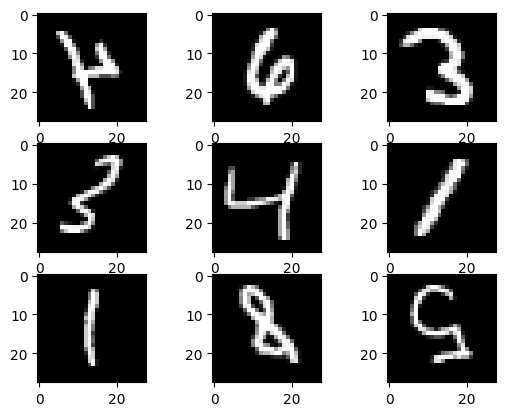

In [ ]:
# 8.3 Configure batch size and retrieve one batch of images
plot_images()

## Image Data Generaor--All in one

In [ ]:
# 9
## G. Mixed. All in one.
#       Another augmentation to image data that can improve performance on
#       large and complex problems is to create random flips of images in
#       training data.  Keras supports random flipping along both the vertical
#       and horizontal axes using the vertical_flip and horizontal_flip arguments.

shift1 = 0.2
shift2 = 0.3
# 9.1 Define data preparation. All are applied in some measure
datagen = ImageDataGenerator(
                             horizontal_flip=True,
                             vertical_flip=True,
                             width_shift_range=shift1,     # Horizontal shift
                             height_shift_range=shift2,     # Vertical shift
                             rotation_range=90,
                             zoom_range = 2.0,
                             shear_range = 30             # Shear angle in counter-clockwise direction in degrees
                            )
# 9.2 Learn data
datagen.fit(X_train)

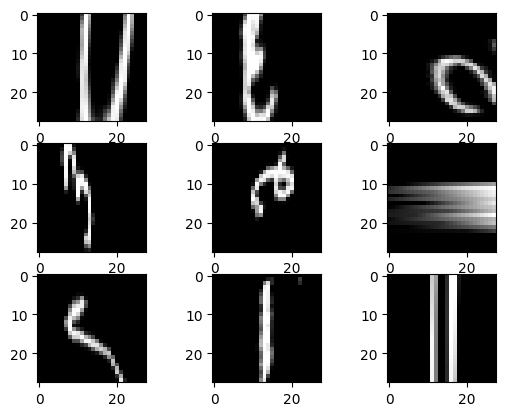

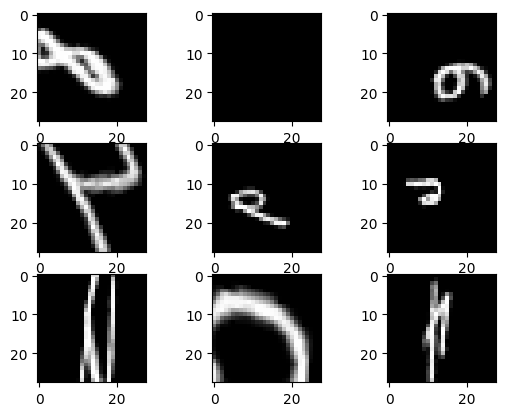

In [ ]:
# 9.3 Configure batch size and retrieve one batch of images
plot_images()
plot_images()

In [ ]:
############ I am done

## Misc

In [ ]:
###################### DD. #############################################

# 9
## F. Saving Augmented Images to File
#      The data preparation and augmentation is performed just in time by Keras.
#      This is efficient in terms of memory, but one may require the exact images
#      used during training. For example, perhaps one would like to use them with
#      a different software package later or only generate them once and use them
#      on multiple different deep learning models or configurations.
#      Keras allows you to save the images generated during training. The directory,
#      filename prefix and image file type can be specified to the flow() function
#      before training.

# 9.1 Define data preparation. All default parameter values
datagen = ImageDataGenerator()

# 9.2 Learn data statistics
datagen.fit(X_train)

# 9.3 Configure batch size and retrieve one batch of images
#dir = "/home/ashok/useless"
dir = "C:\\Users\\ashok\\useless"

# 9.4 Make directory
#os.system('rm -rf  /home/ashok/useless')
os.mkdir("C:\\Users\\ashok\\useless")


# 9.5 Generator iterator.
#     Generate images on-the-fy
data_iterator = datagen.flow(X_train,
                             y_train,
                             batch_size=9,
                             save_to_dir=dir,
                             save_prefix='aug',
                             save_format='png'
                             )

# 9.6 Generate and save
for X_batch, y_batch in data_iterator:
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
    break

########################


In [ ]:
# Supplementary Exercises:
# 1.
import numpy as np
x = np.linspace(-np.pi, +np.pi, 100)
for i in range(0,9):
	plt.subplot(520+i+1)
	plt.plot(x+i*10, np.sin(x+i*10))

plt.show()



# 2.0
x = np.random.randint(low = 0, high = 1000, size = (4,5))
x
x.shape
y = x.reshape((4,5,1))
y.shape
y
# 2.1
y.dtype
y = y.astype('float64')
y.shape


In [ ]:

######################## About ZCA whitening ###########################

##    ZCA Whitening ("Mahalanobis transformation")
#     What is whitening? See: 1. http://cs231n.github.io/neural-networks-2/
#                             2. https://en.wikipedia.org/wiki/Whitening_transformation
#     Whitening is something like PCA
#     A whitening transformation is a linear transformation (as PCA is) that transforms
#     a dataset with a known covariance matrix into a set of new variables whose
#     covariance is the identity matrix, meaning that they are uncorrelated and each
#     have variance 1.
#     The transformation is called "whitening" because it changes the input vector
#     into a white noise vector.
#     Less redundancy in the image is intended to better highlight the structures
#     and features in the image to the learning algorithm. See some images at this link:
#     https://stats.stackexchange.com/a/117459

## Impt Note: Before experimenting EXIT IPYTHON. Execute AA; Jump BB and then come to CC.
#########################################################################


In [ ]:

"""
Using ImageDataGenerator without fitting
========================================

Ref: https://stackoverflow.com/questions/46705600/keras-fit-image-augmentations-to-training-data-using-flow-from-directory
     https://github.com/keras-team/keras/issues/68

Just try to use the following object with zca_whitening:

train_datagen = ImageDataGenerator(
                                    rescale=1. / 255,    # Normalize colour intensities in 0-1 range
                                    shear_range=0.2,     # Shear varies from 0-0.2
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    preprocessing_function=preprocess,
                                    featurewise_center=True,
                                    zca_whitening=True
                                  )

When you do so set epochs to 1 in model.fit_generator.
The fitting process starts with a warning:

`zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)

As data is huge, fit can be called on a sample, as:
train_datagen .fit(X_sample)  # where X_sample is a small but random sample of your data

zca is a technique to remove 'common information'
between pixels. Consider this: We have a rectangle
which is filled with white colour inside and outside
colour is totally black. That is we have a black
rectangle on which is superimposed white rectangle.
If common information is removed, result will be
just a 'white-boundary' of inner rectangle and
both outside and inside of it completely black. We
have, therefore, a sort of embossed picture.

"""

In [ ]:
## My rough work

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [ ]:
x_train.shape  # (60000, 28, 28)
x_test.shape

(60000, 28, 28)

(10000, 28, 28)

(28, 28)

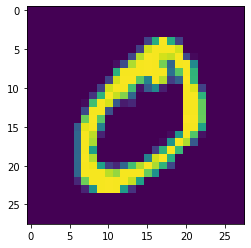

In [ ]:
fig = plt.figure()
plt.imshow(x_train[1])
x_train[1].shape

In [ ]:
shift1 = 0.2
shift2 = 0.3
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             width_shift_range=shift1,     # Horizontal shift
                             height_shift_range=shift2,     # Vertical shift
                             rotation_range=90,
                             zoom_range = 2.0,
                             shear_range = 30   )

In [ ]:
x_train = x_train.reshape(-1, 28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [ ]:
dx = datagen.fit(x_train)

In [ ]:
type(dx)

NoneType

In [ ]:
abc = datagen.flow(x_train,y_train, batch_size = 32)

In [ ]:
batch = next(abc)

In [ ]:
len(batch)   # 2

2

In [ ]:
batch[0].shape

(32, 28, 28, 1)

In [ ]:
for X_batch, y_batch in abc:
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

In [ ]:
help(ImageDataGenerator)

In [ ]:
########## Done ############